In [1]:
%run init_notebookspace.py
from settings import DATA_DIR, MODEL_DIR

DATA_DIR is existant under: C:\Users\LukasGrahl\Documents\GIT\memoire1\data


In [2]:
%matplotlib inline

from gEconpy.classes.model import gEconModel

import matplotlib.pyplot as plt
import seaborn as sns
from src.plotting import plot_dfs
from src.filtering_sampling import solve_updated_mod

import numpy as np
import pandas as pd

import os

from config import plt_config
plt.rcParams.update(plt_config)

globals 

In [10]:
plot_vars = ['Y', 'C', 'L', 'w', 'r']

load model

In [52]:
mods = {
    'mod4_rbc_vanilla': {},
    'mod4_rbc_seplabour': {},
    'mod5_nk_vanilla': {},
}

for item in mods.keys():
    mods[item]['mod'] = gEconModel(os.path.join(MODEL_DIR, f'{item}.gcn'), verbose=False)
    
for item in mods.keys():
    _, mods[item]['mod'] = solve_updated_mod(mods[item]['mod'], verbose=False)
    assert _ == True

In [ ]:
mods

IRF

In [ ]:
mo

In [55]:
shock_size = .1
sim_length = 120

for key in mods.keys():
    mods[key]['irf'] = mods[key]['mod'].impulse_response_function(simulation_length=sim_length, shock_size=shock_size)

In [56]:
from itertools import chain

In [59]:
[x.base_name for x in mods['mod5_nk_vanilla']['mod'].shocks]

['epsilon_A', 'epsilon_R', 'epsilon_pi']

In [64]:
shock = 'epsilon_A'
irfs_list = []
for key in mods.keys():
    try:
        irfs_list.append(mods[key]['irf'].unstack().loc[:, shock].unstack()[plot_vars].copy())
    except KeyError:
        continue
    

# _irf_nkm = irf_nkm.unstack().loc[:, shock].unstack()[plot_vars].copy()

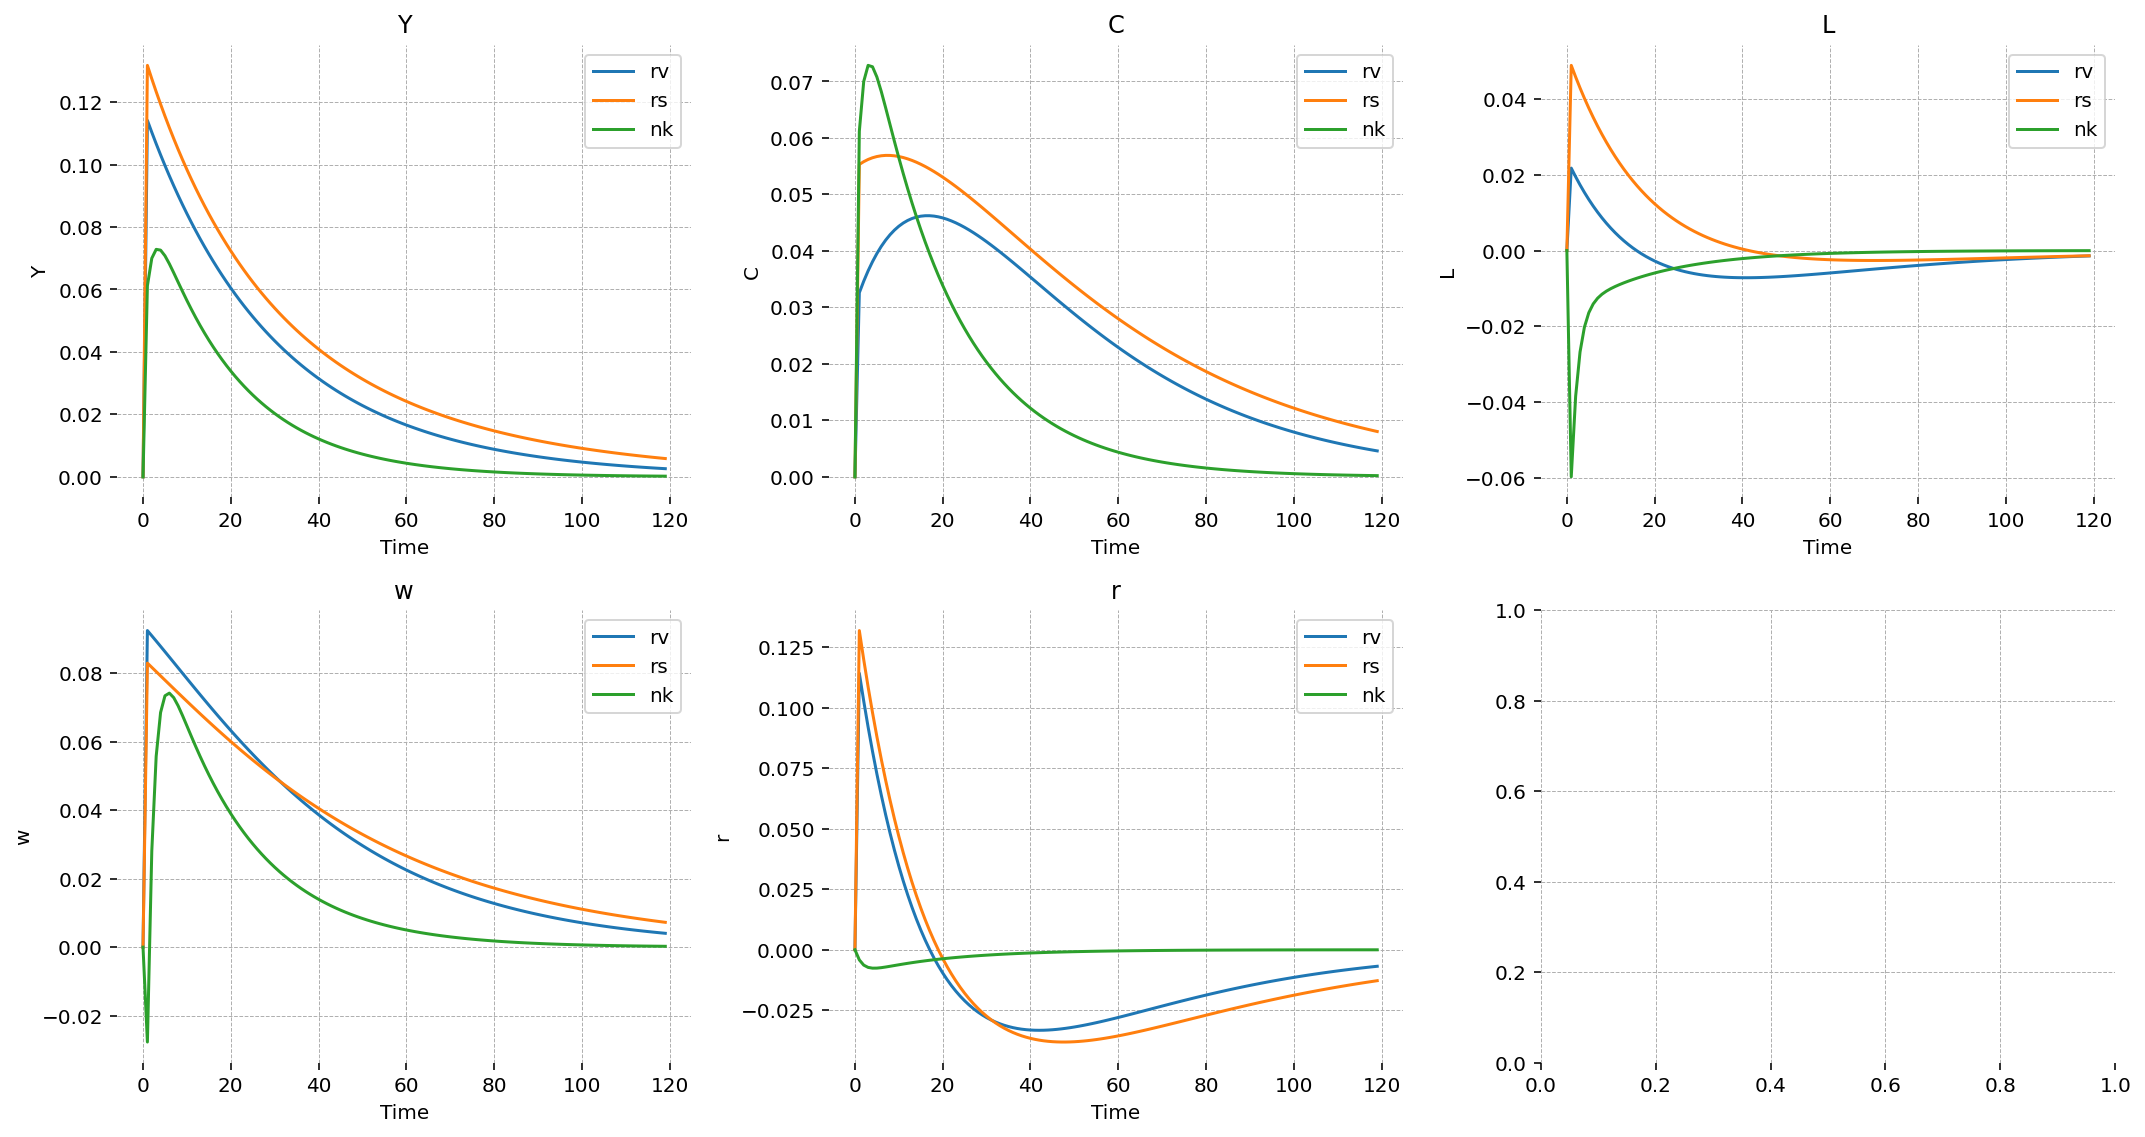

In [71]:
plot_dfs(df_list,
         sns.lineplot,
         figsize=(15, 4), 
         legend=['rv', 'rs', 'nk'])